In [119]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc
import scipy.ndimage as ndimage
from keras.models import load_model

### Image transformation explained

In [109]:
img1 = misc.imread(os.path.join(raw_path,'170cell.png'))
img2_ = misc.imread(os.path.join(dot_segmt_path, '170dots.png'))
img2 = 100.0 * (img2_[:,:,0] > 0) # Converting dotted to gray scale and 100 is a scaling factor which is later divided to get count.
img2 = ndimage.gaussian_filter(img2, sigma=(1, 1), order=0)
print('Shape of original dotted image: ', img2_.shape)
print('Shape of transformed image: ', img2.shape)

Shape of original image:  (256, 256, 3)
Shape of transformed image:  (256, 256)


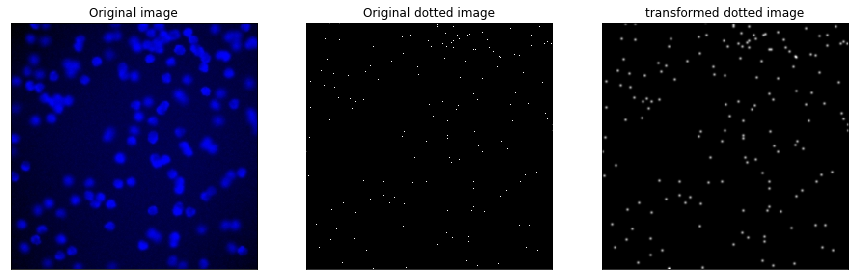

In [110]:
plt.rcParams["figure.figsize"] = [15,8]
plt.subplot(1,3,1), plt.imshow(img1), plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(img2_[:,:,0],cmap = 'gray'), plt.title('Original dotted image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(img2, cmap = 'gray'), plt.title('transformed dotted image'), plt.xticks([]), plt.yticks([])
plt.show()

In [116]:
print('Number of cells in original dotted image: ',(img2_[:,:,0]>10).sum())
print('Number of cells in transformed dotted image: ',np.sum(img2)//100) # 100 is scaling factor which was multiplied in transformation

Number of cells in original dotted image:  159
Number of cells in transformed dotted image:  159.0


### Predictions on new data

In [149]:
raw_path = '/volumes/data/wht_bld_cell_count/new_preds/raw/'

def read_test_img(raw_path):
    data = []
    imList = os.listdir(raw_path)
    for i in range(len(imList)): 
        if 'cell' in imList[i]:
            img1 = misc.imread(os.path.join(raw_path,imList[i]))
            data.append(img1)
    return np.asarray(data, dtype = 'float32'), imList

In [150]:
dot_segmt_path = '/volumes/data/wht_bld_cell_count/new_preds/dots_segmented/'

def read_dot_segmt_img(new_path, img_list):
    anno = []
    for i in range(len(imList)): 
        img2_ = misc.imread(os.path.join(new_path, imList[i][:3] + 'dots.png'))
        img2 = 100.0 * (img2_[:,:,0] > 0)
        img2 = ndimage.gaussian_filter(img2, sigma=(1, 1), order=0)
        anno.append(img2)
    anno = np.asarray(anno, dtype = 'float32')
    return anno

In [182]:
model = load_model('unet_model_counting.h5')
print('Mean and std from trained data, Mean: 30.462919235229492, std: 52.186981201171875')
mean = 30.462919235229492
std = 52.186981201171875
def predict(path):
    test, imList = read_test_img(path)
    test = (test - mean) / std
    preds = model.predict(test)
    preds = preds.reshape(preds.shape[:-1]) ## Removing last axis to make it gray scale.
    return preds, imList

Mean and std from trained data, Mean: 30.462919235229492, std: 52.186981201171875


In [183]:
preds, imList = predict(raw_path)

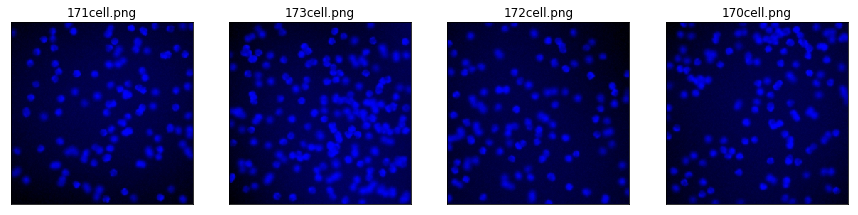

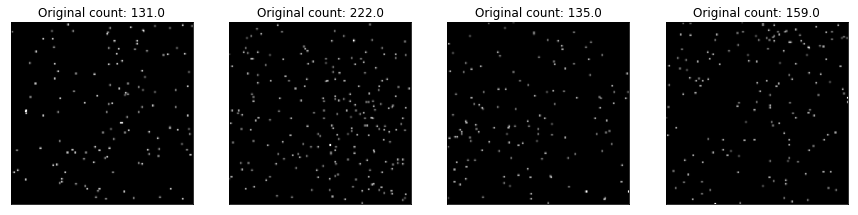

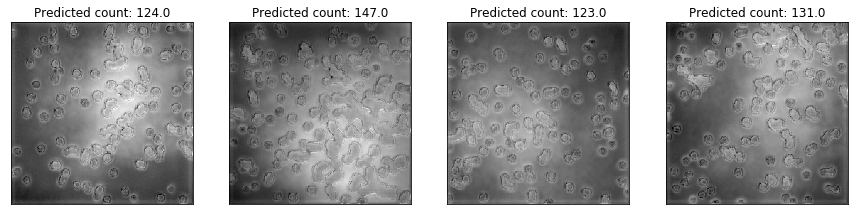

In [184]:
raw_path = '/volumes/data/wht_bld_cell_count/new_preds/raw/'
dot_segmt_path = '/volumes/data/wht_bld_cell_count/new_preds/dots_segmented/'

ori_transformd = read_dot_segmt_img(dot_segmt_path, imList)

plt.rcParams["figure.figsize"] = [15,8]

for i in range(len(preds)):
    img1 = misc.imread(os.path.join(raw_path,imList[i]))
    plt.subplot(1,4,i+1), plt.imshow(img1), plt.title(imList[i]), plt.xticks([]), plt.yticks([])
plt.show() 
    
for i in range(len(preds)):
    plt.subplot(1,4,i+1), plt.imshow(ori_transformd[i], cmap = 'gray'),
    plt.title('Original count: '+ str(np.sum(ori_transformd[i])//100)), plt.xticks([]), plt.yticks([])
plt.show() 
    
for i in range(len(preds)):
    plt.subplot(1,4,i+1), plt.imshow(preds[i], cmap = 'gray'),
    plt.title('Predicted count: '+ str(np.sum(preds[i])//100)), plt.xticks([]), plt.yticks([])
plt.show()            